In [1]:
%matplotlib inline
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from tensorflow.keras.utils import to_categorical
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir = "E:\Documents\Study\Deep Learning\Project\DATA"
data_name = "val2017"
annFile='{}/annotations/instances_{}.json'.format(dataDir,data_name)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports furniture electronic animal person outdoor appliance indoor vehicle food accessory kitchen


In [5]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','sports ball']);
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = imgIds[2])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [6]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
#plt.axis('off')
#plt.imshow(I)
#plt.show()

In [7]:
# load and display instance annotations
#plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco.loadAnns(annIds)
#coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
#annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
#coco_kps=COCO(annFile)

In [9]:
# load and display keypoints annotations
#plt.imshow(I); plt.axis('off')
#ax = plt.gca()
#annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco_kps.loadAnns(annIds)
#coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
#annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
#coco_caps=COCO(annFile)

In [11]:
# load and display caption annotations
#annIds = coco_caps.getAnnIds(imgIds=img['id']);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)
#plt.imshow(I); plt.axis('off'); plt.show()

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!


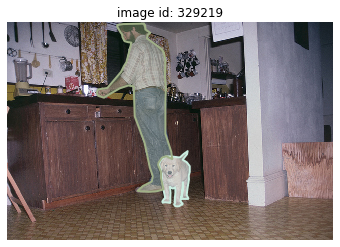

In [12]:
# the index of the image from the set just to visualize 
img_idx = 0

# load captions
coco_caps= COCO(os.path.join(dataDir,r"annotations\captions_" + data_name + ".json"))
# Load insatnces -> here we take the masks
coco_instances = COCO(os.path.join(dataDir,r"annotations\instances_" + data_name + ".json"))
# Load key points
coco_key_p = COCO(os.path.join(dataDir,r"annotations\person_keypoints_" + data_name + ".json")) 

# in the .getCatIds(catNms=[list of all ids we want to filter from the data]);
catIds = coco_instances.getCatIds(catNms=['person', 'dog']);
# get all the image id for all images based on the filter
imgIds = coco_instances.getImgIds(catIds=catIds);

# Visualize the img_idx specified up in the begining

I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[img_idx]).zfill(12) + ".jpg"))
plt.imshow(I); 
plt.axis('off')
plt.title("image id: " + str(imgIds[img_idx]))
# and plot the mask
annIds = coco_instances.getAnnIds(imgIds=imgIds[img_idx], catIds=catIds, iscrowd=None)
anns = coco_instances.loadAnns(annIds)
coco_instances.showAnns(anns)

#plot key points
#annIds_keys = coco_key_p.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
#anns_keys = coco_key_p.loadAnns(annIds_keys)
#coco_key_p.showAnns(anns_keys)

#print the caption
#annIds = coco_caps.getAnnIds(imgIds=imgIds[idx]);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)

(-0.5, 639.5, 426.5, -0.5)

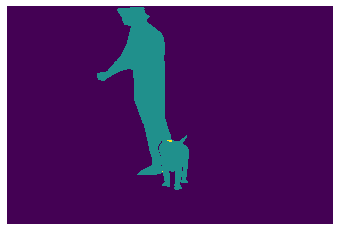

In [13]:
#visualize the mask of the annotaion
mask = int()
for i in range(len(anns)):
    mask += coco_instances.annToMask(anns[i])            
plt.imshow(mask)
plt.axis('off')



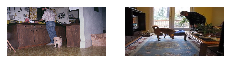

In [14]:
number_of_images = 2
img_width = 640
img_height = 320
for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    plt.imshow(I)
    plt.axis('off')


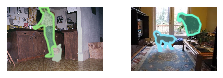

In [15]:

for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
    plt.imshow(I)
    annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    coco_instances.showAnns(anns)
    plt.axis('off')



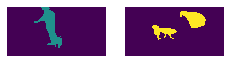

In [16]:

for idx in range(number_of_images):
    plt.subplot(3,3,idx+1)
    annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    mask = int()
    for i in range(len(anns)):
        mask += coco_instances.annToMask(anns[i])  
    mask = cv2.resize(mask, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    plt.imshow(mask)
    plt.axis('off')


In [17]:
mask_list = []
for imgID in imgIds:
    annIds = coco_instances.getAnnIds(imgIds=imgID, catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    mask = int()
    for idx in range(len(anns)):
        mask += coco_instances.annToMask(anns[idx])  
    mask = cv2.resize(mask, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    #print(mask.shape)
    mask_list.append(mask)
    
y_train = np.asarray(mask_list)
y_train = (to_categorical(y_train)).astype('float')

print('y_train shape:', y_train.shape)

y_train shape: (76, 320, 640, 4)


In [18]:
# save the mask to disk converting 0 to 0 and 1 to 256
#cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\TEMP\1.jpg",y_train[0]*256)

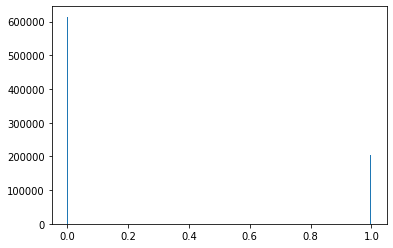

In [23]:
plt.hist(y_train[0].ravel(),256, [0,1]);

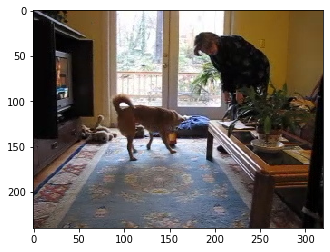

In [20]:
plt.imshow(I)

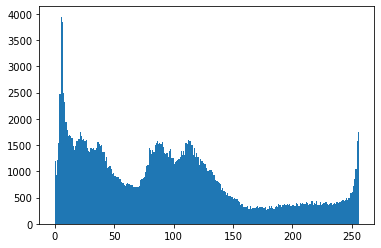

In [21]:
plt.hist(I.ravel(),256, [0,256]);